In [ ]:
import numpy as np

def generate_random_vectors(dimension, num_vectors):
    """Generate random vectors in 2D or 3D space."""
    return [np.random.randint(-10, 10, size=dimension) for _ in range(num_vectors)]

def input_vectors():
    """Input vectors interactively or generate randomly."""
    print("Choose how to provide vectors:")
    print("1. Enter vectors manually")
    print("2. Generate random vectors")
    choice = input("Enter your choice (1/2): ")
    if choice == "1":
        print("Enter vectors in 2D or 3D space as space-separated numbers (e.g., '1 2' or '1 2 3'). Enter 'done' to finish:")
        vectors = []
        dim = None
        while True:
            inp = input(f"Vector {len(vectors) + 1}: ")
            if inp.lower() == "done":
                break
            try:
                vector = list(map(int, inp.split()))
                if dim is None:
                    dim = len(vector)
                if len(vector) != dim:
                    print(f"Please enter a vector of dimension {dim}.")
                else:
                    vectors.append(vector)
            except ValueError:
                print("Invalid input. Please enter space-separated integers.")
    elif choice == "2":
        dim = int(input("Enter the dimension (2 or 3): "))
        num_vectors = int(input("Enter the number of vectors: "))
        vectors = generate_random_vectors(dim, num_vectors)
        print(f"Generated vectors: {vectors}")
    else:
        print("Invalid choice. Exiting.")
        return None, None
    return np.array(vectors), dim

# Example usage:
if __name__ == "__main__":
    # User can choose the mode and dimension
    mode = input("Enter mode ('input' or 'random'): ").strip().lower()
    dimension = int(input("Enter vector dimension (2 or 3): "))
    vector = create_vector(dimension=dimension, mode=mode)
    print(f"Generated vector: {vector}")

Generated vector: [-2.66166645  4.29878123  5.16757154]


In [2]:
z = create_vector()

Enter the components of a 2D vector:


In [3]:
z

array([3., 4.])

In [4]:
import numpy as np

def check_linear_independence(vectors):
    """
    Check if a set of vectors is linearly independent or dependent.

    Parameters:
        vectors (list of list or numpy.ndarray): List of vectors or 2D NumPy array where each row is a vector.

    Returns:
        str: A message indicating whether the vectors are linearly independent or dependent.
    """
    # Convert the input to a NumPy array
    matrix = np.array(vectors)
    
    # Get the rank of the matrix
    rank = np.linalg.matrix_rank(matrix)
    
    # Compare the rank with the number of vectors
    if rank == len(vectors):
        return "The vectors are linearly independent."
    else:
        return "The vectors are linearly dependent."

# Example usage
if __name__ == "__main__":
    # Example: Linearly independent vectors in R^2
    vectors1 = [[1, 0], [0, 1]]
    print(check_linear_independence(vectors1))  # Output: Linearly independent

    # Example: Linearly dependent vectors in R^2
    vectors2 = [[1, 2], [2, 4]]
    print(check_linear_independence(vectors2))  # Output: Linearly dependent

    # Example: Linearly dependent vectors in R^3
    vectors3 = [[1, 2, 3], [2, 4, 6], [3, 6, 9]]
    print(check_linear_independence(vectors3))  # Output: Linearly dependent


The vectors are linearly independent.
The vectors are linearly dependent.
The vectors are linearly dependent.


In [5]:
z1 = create_vector(3)
z2 = create_vector(3)

Enter the components of a 3D vector:
Enter the components of a 3D vector:


In [6]:
z2

array([1., 5., 3.])

In [7]:
z1

array([2., 5., 7.])

In [13]:
len(np.array([z1,z2]))

2

In [15]:
check_linear_independence([z1,z2])

'The vectors are linearly independent.'

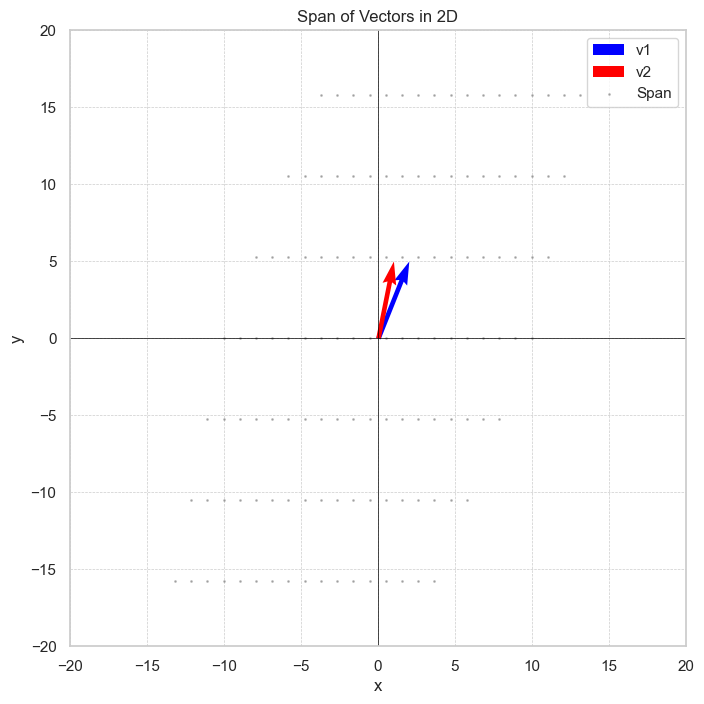

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def visualize_span_2d(v1, v2, scale=10, grid_size=20):
    """
    Compute and visualize the span of two vectors in 2D.

    Parameters:
        v1 (list or numpy.ndarray): The first 2D vector.
        v2 (list or numpy.ndarray): The second 2D vector.
        scale (int): The range of scalar values for linear combinations. Default is 10.
        grid_size (int): Number of points in each direction for the grid. Default is 20.
    """
    v1 = np.array(v1)
    v2 = np.array(v2)
    
    # Create a grid of scalars for linear combinations
    t1 = np.linspace(-scale, scale, grid_size)
    t2 = np.linspace(-scale, scale, grid_size)
    t1, t2 = np.meshgrid(t1, t2)
    
    # Compute the linear combinations of v1 and v2
    x = t1 * v1[0] + t2 * v2[0]
    y = t1 * v1[1] + t2 * v2[1]
    
    # Plotting the span
    plt.figure(figsize=(8, 8))
    plt.quiver(0, 0, v1[0], v1[1], angles='xy', scale_units='xy', scale=1, color='blue', label='v1')
    plt.quiver(0, 0, v2[0], v2[1], angles='xy', scale_units='xy', scale=1, color='red', label='v2')
    plt.scatter(x, y, color='gray', s=1, alpha=0.5, label='Span')
    
    # Formatting the plot
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.xlim(-scale * 2, scale * 2)
    plt.ylim(-scale * 2, scale * 2)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.legend()
    plt.title("Span of Vectors in 2D")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.show()

# Example usage
if __name__ == "__main__":
    v1 = z1  # First vector
    v2 = z2 # Second vector
    visualize_span_2d(v1, v2)


In [20]:
import numpy as np

def find_basis(vectors):
    """
    Find a basis for the span of the given set of vectors.

    Parameters:
        vectors (list of list or numpy.ndarray): List of vectors or 2D NumPy array where each row is a vector.

    Returns:
        numpy.ndarray: A 2D array where each row is a basis vector.
    """
    # Convert the input to a NumPy array
    matrix = np.array(vectors, dtype=float)

    # Perform row-reduction (Gaussian elimination)
    q, r = np.linalg.qr(matrix.T)  # Transpose for QR decomposition
    independent_indices = np.where(np.abs(np.diagonal(r)) > 1e-10)[0]  # Identify independent columns
    
    # Extract linearly independent vectors
    basis = matrix[independent_indices]
    
    return basis

# Example usage
if __name__ == "__main__":
    # Example 1: Dependent vectors in R^3
    vectors1 = [
        [1, 2, 3],
        [2, 4, 6],
        [1, 0, 1]
    ]
    basis1 = find_basis(vectors1)
    print("Basis for the span of vectors1:")
    print(basis1)

    # Example 2: Vectors in R^2
    vectors2 = [
        [1, 0],
        [0, 1],
        [1, 1]
    ]
    basis2 = find_basis(vectors2)
    print("\nBasis for the span of vectors2:")
    print(basis2)


Basis for the span of vectors1:
[[1. 2. 3.]
 [1. 0. 1.]]

Basis for the span of vectors2:
[[1. 0.]
 [0. 1.]]


In [21]:
import numpy as np

def find_linear_combination(vectors, target):
    """
    Find the coefficients for the linear combination of vectors that results in the target vector.

    Parameters:
        vectors (list of list or numpy.ndarray): List of vectors or 2D NumPy array where each column is a vector.
        target (list or numpy.ndarray): The target vector to represent as a linear combination.

    Returns:
        numpy.ndarray: Coefficients for the linear combination.
    """
    # Convert input to NumPy arrays
    A = np.array(vectors).T  # Columns of A are the input vectors
    R = np.array(target)
    
    # Solve the equation A * x = R
    try:
        # Use least squares to handle both square and non-square systems
        coefficients, residuals, rank, _ = np.linalg.lstsq(A, R, rcond=None)
        return coefficients
    except np.linalg.LinAlgError:
        raise ValueError("Cannot solve the system; the vectors may be linearly dependent or inconsistent.")

# Example usage
if __name__ == "__main__":
    # Define vectors v1, v2, v3
    v1 = [1, 0, 0]
    v2 = [0, 1, 0]
    v3 = [0, 0, 1]
    vectors = [v1, v2, v3]  # Combine into a list
    
    # Define the target vector R
    R = [2, 3, 4]
    
    # Find coefficients
    coefficients = find_linear_combination(vectors, R)
    print("Coefficients for the linear combination:")
    print(coefficients)


Coefficients for the linear combination:
[2. 3. 4.]
